In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

In [3]:
X, Y = load_planar_dataset()

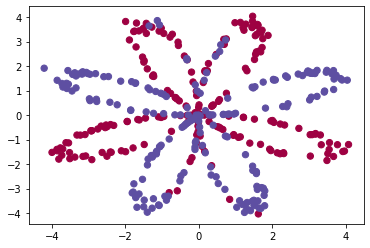

In [4]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

You have:

- a numpy-array (matrix) X that contains your features (x1, x2)
- a numpy-array (vector) Y that contains your labels (red:0, blue:1).


##### Let us check the shape of  our data

In [5]:
print('Shape_X :',X.shape)
print('Shape_Y :',Y.shape)

Shape_X : (2, 400)
Shape_Y : (1, 400)


#### Size of the training set

In [6]:
m = X.shape[1]

## SIMPLE LOGISTIC REGRESSION

In [7]:
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

c:\users\abx9801\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We are now plotting Decision Boundry of Simple Logistic Regression. The Classification is aweful

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


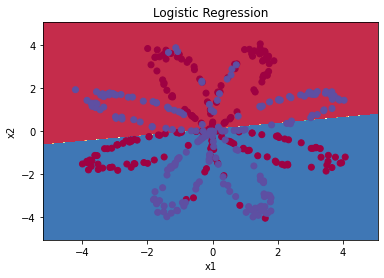

In [11]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

### DEFINING NEURAL NETWORK STRUCTURE

In [13]:
n_x = X.shape[0] # Input layer
n_h = 4          # Hidden Layer
n_y = Y.shape[0] # Output Layer

### Initializing Parameters

In [14]:
def initialize(n_x,n_h,n_y):
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    parameters = {'W1':W1,'b1':b1,'W2':W2,'b2':b2}
    
    return parameters

### Forward Propagation

In [15]:
def forward_prop(X,parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    
    cache = {'Z1':Z1,'A1':A1,'Z2':Z2,'A2':A2}
    return A2,cache

### Computing Cost

In [17]:
def compute_cost(A2,Y):
    m = Y.shape[1]
    J = (-1/m)*(Y*np.log(A2)+(1-Y)*np.log(1-A2))
    return J

### Backprop

In [19]:
def back_prop(parameters,cache,X,Y):
    
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2 = A2-Y
    dW2 = (1/m)*(np.dot(dZ2,A1.T))
    db2 = (1/m)*(np.sum(dZ2,axis=1,keepdims=True))
    dZ1 = np.dot(W2.T,dZ2)*(1 - np.square(A1))
    dW1 = (1/m)*(np.dot(dZ1,X.T))
    db1 = (1/m)*(np.sum(dZ1,axis=1,keepdims=True))
    
    grads = {'dW1':dW1,'db1':db1,'dW2':dW2,'db2':db2}
    return grads

### Updating Parameters

In [20]:
def update_parameters(parameters,grads,learning_rate):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    
    W1 = W1 - learning_rate*(dW1)
    b1 = b1 - learning_rate*(db1)
    W2 = W2 - learning_rate*(dW2)
    b2 = b2 - learning_rate*(db2)
    
    parameters = {'W1':W1,'b1':b1,'W2':W2,'b2':b2}
    
    return parameters

### Model

In [21]:
def model(X,Y,learning_rate,iterations):
    
    parameters = initialize(n_x,n_h,n_y)
    
    for i in range(iterations):
        A2,cache = forward_prop(X,parameters)
        
        grads = back_prop(parameters,cache,X,Y)
        
        parameters = update_parameters(parameters,grads,learning_rate)
        
    return parameters

### Training

In [22]:
import time

In [23]:
tic = time.time()
final_parameters = model(X,Y,1.2,10000)
toc = time.time()
print('Training Time :',toc-tic,'seconds')

Training Time : 2.0745701789855957 seconds


In [24]:
Y_prediction,_ = forward_prop(X,final_parameters)

Rounding off

In [26]:
for i in range(400):
    if(Y_prediction[0][i]>0.5):
        Y_prediction[0][i] = 1
    else:
        Y_prediction[0][i] = 0

In [43]:
print(Y_prediction)

[[0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0.
  1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
  0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

### Accuracy

In [48]:
print(Y)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1]]


In [50]:
c = 0
for i in range(400):
    if(Y_prediction[0][i]==Y[0][i]):
        c+=1
print('Accuracy :',(c/400)*100,'%')

Accuracy : 90.75 %


### PLOTTING DECISION BOUNDRY

In [53]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_prop(X, parameters)
    predictions =( A2 > 0.5 ) * 1
    ### END CODE HERE ###
    
    return predictions

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

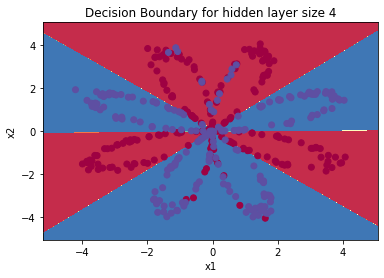

In [54]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(final_parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))